In [3]:
import cv2
alg = "haarcascade_frontalface_default.xml"
haar_cascade = cv2.CascadeClassifier(alg)
# loading the image path into file_name variable
file_name = "Firefly_Cast_Promo_Fox.jpg"
# reading the image
img = cv2.imread(file_name, 0)
# creating a black and white version of the image
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# detecting the faces
faces = haar_cascade.detectMultiScale(
    gray_img, scaleFactor=1.05, minNeighbors=5, minSize=(100, 100)
)

i = 0
# for each face detected
for x, y, w, h in faces:
    # crop the image to select only the face
    cropped_image = img[y : y + h, x : x + w]
    # loading the target image path into target_file_name variable 
    target_file_name = 'stored-faces/' + str(i) + '.jpg'
    cv2.imwrite(
        target_file_name,
        cropped_image,
    )
    i = i + 1;

In [4]:
# importing the required libraries
from dotenv import load_dotenv
import numpy as np
from imgbeddings import imgbeddings
from PIL import Image
import psycopg2
import os

# Load environment variables
load_dotenv()

# Retrieve database connection parameters
db_host = os.getenv("DB_HOST")
db_name = os.getenv("DB_NAME")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")

# Construct the connection string
conn_str = f"host={db_host} dbname={db_name} user={db_user} password={db_password}"

# Connect to the database
conn = psycopg2.connect(conn_str)

for filename in os.listdir("stored-faces"):
    # opening the image
    img = Image.open("stored-faces/" + filename)
    # loading the `imgbeddings`
    ibed = imgbeddings()
    # calculating the embeddings
    embedding = ibed.to_embeddings(img)
    cur = conn.cursor()
    cur.execute("INSERT INTO pictures values (%s,%s)", (filename, embedding[0].tolist()))
    print(filename)
conn.commit()

/home/sage/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:655: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(
/home/sage/.local/lib/python3.10/site-packages/transformers/models/clip/processing_clip.py:144: FutureWarning: `feature_extractor` is deprecated and will be removed in v5. Use `image_processor` instead.
  warnings.warn(


8.jpg
5.jpg
4.jpg
2.jpg
6.jpg
3.jpg
1.jpg
0.jpg
7.jpg


In [5]:
# Load face image path into file_name variable
file_name = "cast_one.jpg"  
# Openthe image
img = Image.open(file_name)
# Load the `imgbeddings`
ibed = imgbeddings()
# Calculate the embeddings
embedding = ibed.to_embeddings(img)

Here is the face to find from the group photo:


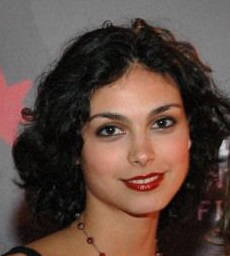

Matched face from group photo:


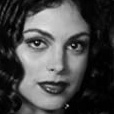

In [10]:
from IPython.display import Image, display

# Image to match
print("Here is the face to find from the group photo:")
display(Image(filename=file_name))

# Find and display match
print("Matched face from group photo:")
cur = conn.cursor()
string_representation = "["+ ",".join(str(x) for x in embedding[0].tolist()) +"]"
cur.execute("SELECT * FROM pictures ORDER BY embedding <-> %s LIMIT 1;", (string_representation,))
rows = cur.fetchall()
for row in rows:
    display(Image(filename="stored-faces/"+row[0]))
cur.close()

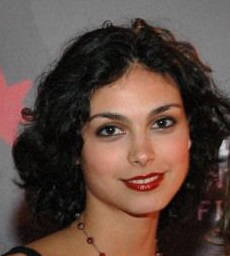